In [1]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
# Import the time library and datetime module from the datetime library
import time
from datetime import datetime
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=" + weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

633

In [5]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | shingu
Processing Record 2 of Set 1 | east london
Processing Record 3 of Set 1 | guanica
Processing Record 4 of Set 1 | lazaro cardenas
Processing Record 5 of Set 1 | pingchen
City not found. Skipping...
Processing Record 6 of Set 1 | vaini
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | contai
Processing Record 10 of Set 1 | kapaa
Processing Record 11 of Set 1 | canon city
Processing Record 12 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | port alfred
Processing Record 15 of Set 1 | shubarkuduk
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | pisco
Processing Record 18 of Set 1 | barcelos
Processing Record 19 of Set 1 | nioro
Processing Record 20 of Set 1 | cidreira
Processing Record 21 of Set 1 | teguldet
Processing Record 22 of Set

Processing Record 39 of Set 4 | kaitangata
Processing Record 40 of Set 4 | amderma
City not found. Skipping...
Processing Record 41 of Set 4 | jamame
Processing Record 42 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 43 of Set 4 | dipkarpaz
City not found. Skipping...
Processing Record 44 of Set 4 | ilulissat
Processing Record 45 of Set 4 | gravelbourg
Processing Record 46 of Set 4 | urucui
Processing Record 47 of Set 4 | puerto ayora
Processing Record 48 of Set 4 | safaga
Processing Record 49 of Set 4 | kolokani
Processing Record 50 of Set 4 | iqaluit
Processing Record 1 of Set 5 | erenhot
Processing Record 2 of Set 5 | korla
Processing Record 3 of Set 5 | bonnyville
Processing Record 4 of Set 5 | alice springs
Processing Record 5 of Set 5 | kloulklubed
Processing Record 6 of Set 5 | qaanaaq
Processing Record 7 of Set 5 | palabuhanratu
City not found. Skipping...
Processing Record 8 of Set 5 | rehoboth
Processing Record 9 of Set 5 | port-gentil
Processing Record

Processing Record 29 of Set 8 | namatanai
Processing Record 30 of Set 8 | bereda
Processing Record 31 of Set 8 | atar
Processing Record 32 of Set 8 | barentsburg
City not found. Skipping...
Processing Record 33 of Set 8 | amahai
Processing Record 34 of Set 8 | hami
Processing Record 35 of Set 8 | saint anthony
Processing Record 36 of Set 8 | constitucion
Processing Record 37 of Set 8 | asmara
Processing Record 38 of Set 8 | saskylakh
Processing Record 39 of Set 8 | sovetskiy
Processing Record 40 of Set 8 | whittlesea
Processing Record 41 of Set 8 | suntar
Processing Record 42 of Set 8 | narasannapeta
Processing Record 43 of Set 8 | baijiantan
Processing Record 44 of Set 8 | kruisfontein
Processing Record 45 of Set 8 | tuy hoa
Processing Record 46 of Set 8 | pampierstad
Processing Record 47 of Set 8 | honiara
Processing Record 48 of Set 8 | maragogi
Processing Record 49 of Set 8 | kataysk
Processing Record 50 of Set 8 | esmeraldas
Processing Record 1 of Set 9 | bargal
City not found. Sk

Processing Record 19 of Set 12 | hammerfest
Processing Record 20 of Set 12 | gushikawa
Processing Record 21 of Set 12 | sao joao do paraiso
Processing Record 22 of Set 12 | kavieng
Processing Record 23 of Set 12 | tual
Processing Record 24 of Set 12 | mezen
Processing Record 25 of Set 12 | wai
Processing Record 26 of Set 12 | zhengjiatun
Processing Record 27 of Set 12 | kemi
Processing Record 28 of Set 12 | zolotinka
City not found. Skipping...
Processing Record 29 of Set 12 | ironton
Processing Record 30 of Set 12 | clovis
Processing Record 31 of Set 12 | dodge city
Processing Record 32 of Set 12 | poronaysk
Processing Record 33 of Set 12 | kigorobya
Processing Record 34 of Set 12 | christchurch
Processing Record 35 of Set 12 | north myrtle beach
Processing Record 36 of Set 12 | walla walla
Processing Record 37 of Set 12 | goleniow
Processing Record 38 of Set 12 | vigrestad
Processing Record 39 of Set 12 | sur
Processing Record 40 of Set 12 | chernyshevskiy
Processing Record 41 of Set

In [6]:
# Convert the array of dictionaries to a Pandas Dataframe.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Shingu,33.7333,135.9833,38.37,76,95,6.60,JP,2022-01-29 19:17:02
1,East London,-33.0153,27.9116,72.39,78,100,12.97,ZA,2022-01-29 19:15:28
2,Guanica,17.9716,-66.9080,85.60,69,11,7.00,PR,2022-01-29 19:17:03
3,Lazaro Cardenas,17.9583,-102.2000,83.43,57,0,7.07,MX,2022-01-29 19:17:03
4,Vaini,-21.2000,-175.2000,81.34,79,100,17.36,TO,2022-01-29 19:17:04
5,Albany,42.6001,-73.9662,15.15,64,100,8.01,US,2022-01-29 19:17:04
6,Ushuaia,-54.8000,-68.3000,49.66,87,100,20.71,AR,2022-01-29 19:17:04
7,Contai,21.7786,87.7536,61.41,40,0,3.94,IN,2022-01-29 19:17:05
8,Kapaa,22.0752,-159.3190,77.32,82,100,11.50,US,2022-01-29 19:17:06
9,Canon City,38.4410,-105.2424,58.98,11,0,11.01,US,2022-01-29 19:17:06


In [7]:
len(city_data)

583

In [9]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Shingu,JP,2022-01-29 19:17:02,33.7333,135.9833,38.37,76,95,6.60
1,East London,ZA,2022-01-29 19:15:28,-33.0153,27.9116,72.39,78,100,12.97
2,Guanica,PR,2022-01-29 19:17:03,17.9716,-66.9080,85.60,69,11,7.00
3,Lazaro Cardenas,MX,2022-01-29 19:17:03,17.9583,-102.2000,83.43,57,0,7.07
4,Vaini,TO,2022-01-29 19:17:04,-21.2000,-175.2000,81.34,79,100,17.36
...,...,...,...,...,...,...,...,...,...
578,Maningrida,AU,2022-01-29 19:32:00,-12.0667,134.2667,80.17,82,100,14.61
579,Karaton,ID,2022-01-29 19:32:00,-6.3424,106.1045,78.96,92,98,2.21
580,Oistins,BB,2022-01-29 19:32:00,13.0667,-59.5333,80.69,65,40,18.41
581,Micheweni,TZ,2022-01-29 19:32:01,-4.9667,39.8333,80.31,76,100,8.30


In [10]:
# Create the output file (CSV)
output_data_file = "Weather_data/cities.csv"
# Export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fileds from DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


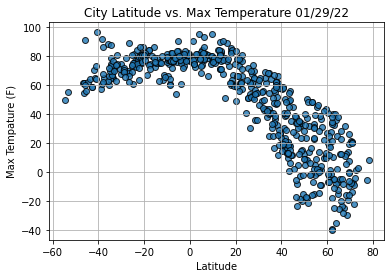

In [12]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats, max_temps, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Tempature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Weather_data/Fig1.png")

# Show plot
plt.show()

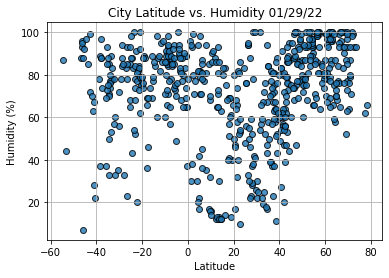

In [13]:
# Build the scatter plot for latitude vs. humidity
plt.scatter(lats, humidity, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Weather_data/Fig2.png")

# Show plot
plt.show()

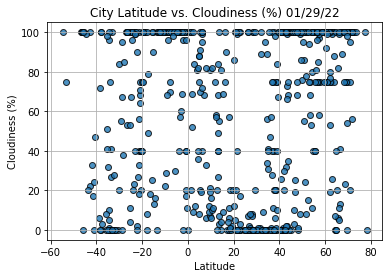

In [16]:
# Build the scatter plot for latitude vs. cloudiness
plt.scatter(lats, cloudiness, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Weather_data/Fig3.png")

# Show plot
plt.show()

In [ ]:
# Build the scatter plot for latitude vs. wind speed
plt.scatter(lats, wind_speed, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Weather_data/Fig2.png")

# Show plot
plt.show()